Text(0, 0.5, 'Temperature')

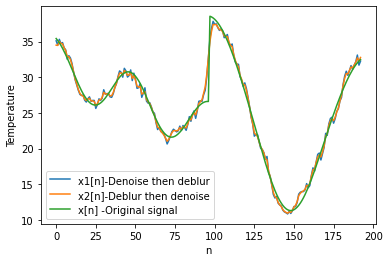

In [29]:
import pandas as pd                                     #python library to read .cvs file
import matplotlib.pyplot as plt                         #python library to plot graphs
import cmath                                            #python library for mathematical functions

Data=pd.read_csv('data.csv')                            #reading data.csv file
xn = Data['x[n]']                                       #xn stores values of x[n]
yn = Data['y[n]']                                       #yn stores values of y[n]

def denoise(m):                                         #self-defined function to denoise a signal
    l=[]
    for i in range(193):                                #for denoising the signal we have used the concept of averaging 
        if i==0 or i==192:                              #we create 3 cases, one for n=0 or n=192, one for n=1 or n=191 and one for 2<=n<=190
            temp=0                                      
            for j in range(3):                          #for n=0, we find average of y[0],y[1],y[2]
                temp+=yn[abs(i-j)]                      #for n=192, we find average of y[190],y[191],y[192]
            l.append(temp/3)
        elif i==1 or i==191:
            temp=0
            for j in range(4):                          #for n=1, we find average of y[0],y[1],y[2],y[3]
                temp+=yn[abs(i-j)]                      #for n=191, we find average of y[189],y[190],y[191],y[192]
            l.append(temp/4)
        else:
            temp=0
            for j in range(-2,3,1):                    #for 2<=n<=190, we find average of y[n-2],y[n-1],y[n],y[n+1],y[n+2]
                temp+=yn[i-j]
            l.append(temp/5)
    return l                                          #returning denoised signal

def deblur(n):                                        #self-defined function to deblur a signal  
    hn = [1/16, 1/4, 3/8, 1/4, 1/16]
    yf=[]                                             # to store fourier transform of y[n]
    hf=[]                                             # to store fourier transform of h[n]
    for i in range(193):                              #finding fourier tranform of y[n]
        temp=0
        for j in range(193):
            temp+=(n[j]*(cmath.exp(complex(0,(-2*cmath.pi*i*j/193)))))
        yf.append(temp)
    for i in range(193):                              #finding fourier tranform of h[n]
        temp=0
        for j in range(len(hn)):
            temp+=(hn[j]*(cmath.exp(complex(0,(-2*cmath.pi*i*(j-2)/193)))))
        if temp.real <=0.5:                           #setting cut-off value of H[n] to avoid unusual spikes in plot of X[n]
            temp=0.5
        hf.append(temp)
    g = []
    for i in range(len(yf)):                          #storing value of X[n]=Y[n]/H[n] in a list g
        g.append(yf[i]/hf[i])
    db=[]
    for i in range(193):                              #finding inverse fourier tranform of X[n]
        temp=0
        for j in range(193):
            temp+=((g[j])*cmath.exp(complex(0,2*cmath.pi*j*i/193)))
        db.append(temp/193)
    return db                                         #returning deblurred signal


plt.plot(deblur(denoise(yn)))                           #plotting signal x1[n]-Denoise then deblur
plt.plot(denoise(deblur(yn)))                           #plotting signal x2[n]-Deblur then denoise
plt.plot(xn)                                            #plotting signal x[n]-Original signal
plt.legend(['x1[n]-Denoise then deblur','x2[n]-Deblur then denoise','x[n] -Original signal']) 
plt.xlabel('n')
plt.ylabel('Temperature')
